# Chapter 2 
## An Array of Sequences

### ABC

- Before creating Python , Guido was a contributor to the ABC language 
- ABC introduced many ideas we now consider 'Pythonic'
   - generic operations on sequences 
   - built in tuple and mapping types 
   - structure by indentation 
   - strong typing without variable declaration
        
**Note :** Python was inherited from ABC

Some Rich set of common operations are including -
    - iteration, 
    - slicing, 
    - sorting and 
    - concatenation

**Strings, lists, byte , sequences, arrays, XML elements, and database** results share these rich set of common operations.

The reason we need to understand the variety of sequences available in Python
 - is to save us from reinventing the wheel 
 - their common interface could inspire us to create APIs that properly support and leverage existing and future sequence types

### Overview of Built-In Sequences

standard library offers a rich selection of sequence types implemented in C

These sequence types are -

- Container sequences
    - Definition : Container sequences hold references to the objects they contain, which may be of any type
    - list, tuple, and collections.deque can hold items of diffrent types
    - holds reference to the object they contain and the object could be of any type 
    
        **List :**
        a=[1,2,3,4]

        **Tuple :**
        a= (year,month,date)
        
        **collections.deque :**
        A deque is a double-ended queue. It can be used to add or remove elements from both ends.
       
       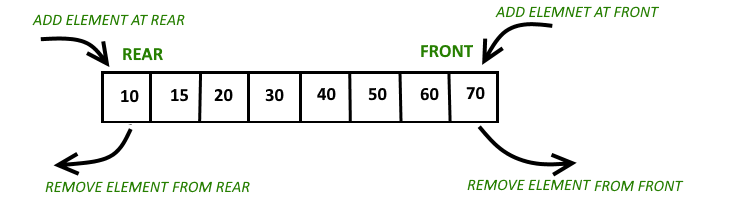
            Fig : Deque algorithm

- Flat sequences
    - str, bytes, bytearray, memoryview, and array.array hold items of different types
    - physically store the value of each item within its own memory space, and not as distinct objects
    - That's why they are more compact
    - but they are limited to holding primitive values like characters, bytes, and numbers
    
         **Bytes :**
           bytes() function:
            Return a new "bytes" object, which is an immutable sequence of small integers in the range 0 <= x < 256, print as ASCII characters when displayed. bytes is an immutable version of bytearray – it has the same non-mutating methods and the same indexing and slicing behavior.
             
       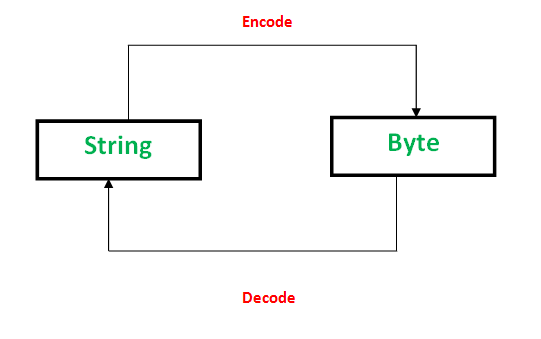
       
       **Byte Array :**
         bytearray() method :  returns a bytearray object which is an array of the given bytes.

         
         
     
       
    
 

In [2]:
from collections import deque
     
# Declaring deque
queue = deque(['name','age','DOB']) 
     
print(queue)

deque(['name', 'age', 'DOB'])


In [3]:
# Python code to demonstrate String encoding

# initialising a String
#byte exmaple
a = 'GeeksforGeeks'

# initialising a byte object
c = b'GeeksforGeeks'

# using encode() to encode the String
# encoded version of a is stored in d
# using ASCII mapping
d = a.encode('ASCII')

# checking if a is converted to bytes or not
if (d==c):
	print ("Encoding successful")
else : print ("Encoding Unsuccessful")


Encoding successful


In [4]:
# bytearray
prime_numbers = [2, 3, 5, 7]
# convert list to bytearray
byte_array = bytearray(prime_numbers)
print(byte_array)

bytearray(b'\x02\x03\x05\x07')


In [5]:
#bytearray

string = "Python is interesting."

# string with encoding 'utf-8'
arr = bytearray(string, 'utf-8')
print(arr)

bytearray(b'Python is interesting.')


### Overview of Built-In Sequences

Another way of grouping sequence type is by mutability 

**Mutable Sequence** : 
list, bytearray, array.array, collections.deque, and memoryview

**Immutable sequences**:
tuple, str, and bytes

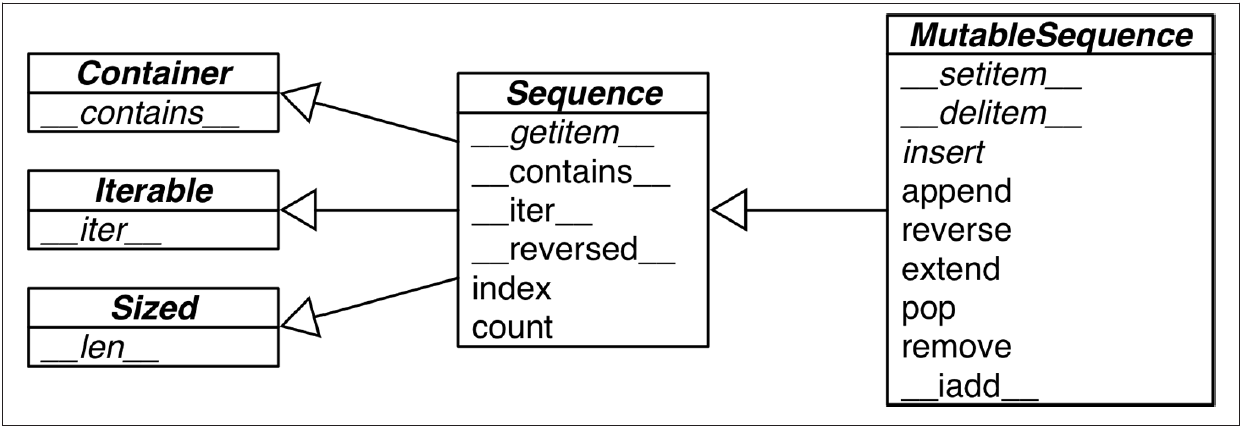

Fig : UML class diagram for some classes from collections.abc (superclasses are
on the left; inheritance arrows point from subclasses to superclasses; names in italic are
abstract classes and abstract methods

list comprehensions - a powerful way of building lists that is somewhat underused because the syntax may be
unfamiliar.



### List Comprehensions and Generator Expressions

### List Comprehensions and Readability



Example 2-1. Build a list of Unicode codepoints from a string

In [6]:
symbols = '$¢£¥€¤'
codes = []
for symbol in symbols:
    codes.append(ord(symbol))
print(codes)

[36, 162, 163, 165, 8364, 164]


Example 2-2. Build a list of Unicode codepoints from a string, take two

In [7]:
symbols = '$¢£¥€¤'
codes=[ord(symbol) for symbol in symbols]
print(codes)

[36, 162, 163, 165, 8364, 164]


**for loop is used**
- scanning a sequence to count or pick items
- computing aggregates (sums, averages)
- any number of other processing tasks

**list comp**
- to build a new list 

### Listcomps No Longer Leak Their Variables

**Syntax :**
- line breaks are ignored inside pairs of [], {}, or ()

In [15]:
# Python 2.7.6
x = 'my precious'
dummy = [x for x in 'ABC']


In [16]:
# Python 2.7.6 , supposed to print 'C'
x  

'my precious'

In [17]:
# Python 3
x = 'ABC'
dummy = [ord(x) for x in x]


In [18]:
x

'ABC'

In [19]:
dummy

[65, 66, 67]

### Conclusion of above comparison of the code
- The value of x is preserved.
- The list comprehension produces the expected list

### Listcomps Versus map and filter

Listcomps do everything the map and filter functions do, without the contortions of the functionally challenged Python lambda

Example 2-3. The same list built by a listcomp and a map/filter composition

In [20]:
symbols = '$¢£¥€¤'
beyond_ascii = [ord(s) for s in symbols if ord(s) > 127]
beyond_ascii

[162, 163, 165, 8364, 164]


**lambda function**

- A lambda function is a small anonymous function.
- A lambda function can take any number of arguments, but can only have one expression.

**Syntax**

lambda arguments : expression


In [21]:
x = lambda a : a + 10
print(x(5))

15


In [22]:
s= lambda s : s + 'thi'
print(s('pri'))

prithi


**lambda**

The power of lambda is better shown when you use them as an anonymous function inside another function.

Say you have a function definition that takes one argument, and that argument will be multiplied with an unknown number:

In [24]:
def myfunc(n):
  return lambda a : a * n

mydoubler = myfunc(2)

print(mydoubler(11))


22


**map**
- The map() function executes a specified function for each item in an iterable. 
- The item is sent to the function as a parameter.

**syntax**

map(function, iterables)


In [26]:
def myfunc(a):
  return len(a)

x = map(myfunc, ('apple', 'banana', 'cherry'))

print(x)

#convert the map into a list, for readability:
print(list(x))


[5, 6, 6]


**filter**

- The filter() method filters the given sequence with the help of a function that tests each element in the sequence to be true or not.

**filter syntax**

filter(function, sequence)

Example 2-3. The same list built by a listcomp and a map/filter composition

In [28]:
symbols = '$¢£¥€¤'
beyond_ascii= list(filter(lambda a: a > 127,map(ord,symbols)))
beyond_ascii

[162, 163, 165, 8364, 164]

In [30]:
# see which one is faster 
import timeit

TIMES = 10000

SETUP = """
symbols = '$¢£¥€¤'
def non_ascii(c):
    return c > 127
"""

def clock(label, cmd):
    res = timeit.repeat(cmd, setup=SETUP, number=TIMES)
    print(label, *('{:.3f}'.format(x) for x in res))

clock('listcomp        :', '[ord(s) for s in symbols if ord(s) > 127]')
clock('listcomp + func :', '[ord(s) for s in symbols if non_ascii(ord(s))]')
clock('filter + lambda :', 'list(filter(lambda c: c > 127, map(ord, symbols)))')
clock('filter + func   :', 'list(filter(non_ascii, map(ord, symbols)))')

listcomp        : 0.021 0.018 0.013 0.011 0.010
listcomp + func : 0.019 0.016 0.015 0.013 0.016
filter + lambda : 0.016 0.013 0.012 0.012 0.011
filter + func   : 0.011 0.012 0.011 0.012 0.012


# Cartesian Products

- Listcomps can generate lists from the Cartesian product of two or more iterables

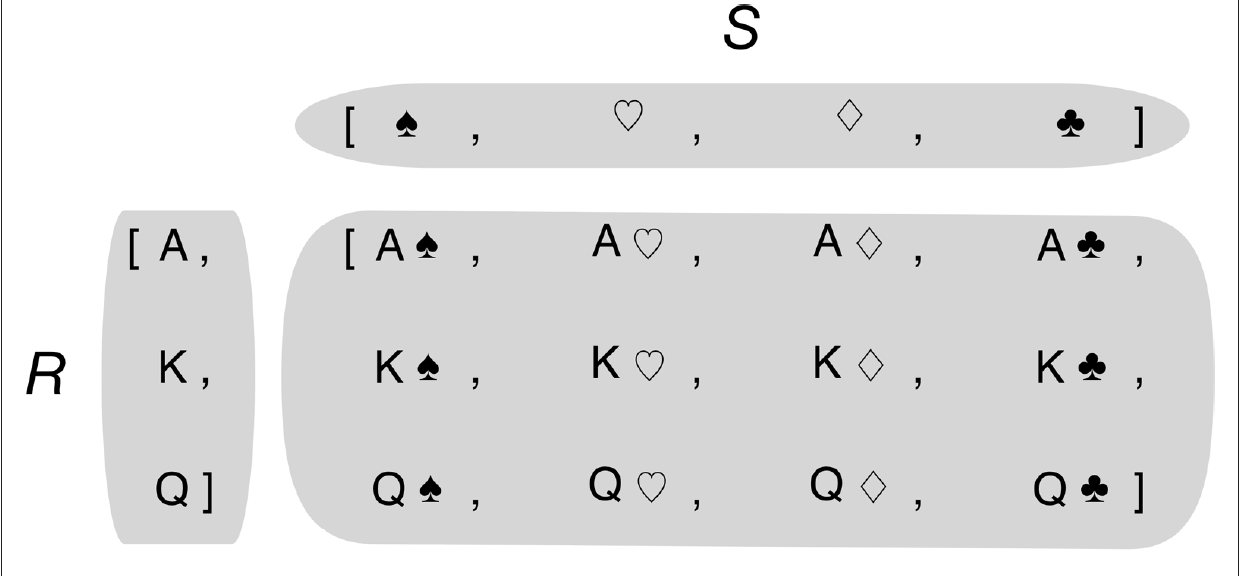

Example 2-4. Cartesian product using a list comprehension


In [35]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [36]:
for color in colors:
    for size in sizes:
        print((color, size))

('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


In [37]:
tshirts = [(color, size) for size in sizes
  for color in colors]

In [38]:
tshirts


[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

### generator expression

- To initialize **tuples, arrays, and other types of sequences**, you could also start from a listcomp, but a genexp saves memory because it yields items one by one using the iterator protocol instead of building a whole list just to feed another constructor.
- An iterator protocol is nothing but a specific class in Python which further has the __next()__ method.
- Initializing a tuple and an array from a generator expression

In [46]:
symbols='$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [47]:
import array
array.array('I',(ord(symbol) for symbol in symbols))

array('I', [36, 162, 163, 165, 8364, 164])

Example 2-6 uses a genexp with a Cartesian product to print out a roster of T-shirts of
two colors in three sizes.

If the two lists used in the Cartesian product had 1,000 items each, using
a generator expression would save the expense of building a list with a million items
just to feed the for loop.

Example 2-6. Cartesian product in a generator expression


In [48]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
# print "this is a tuple: %s" % (thetuple,)
for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


In [55]:
( '%s %s' % (c, s) for c in colors for s in sizes)

 

<generator object <genexpr> at 0x000001D9F6638848>

The generator expression yields items one by one; a list with all six T-shirt
variations is never produced in this example.

### Tuples Are Not Just Immutable Lists

- Some introductory texts about Python present tuples as “immutable lists,” but that is short selling them.
- double duty of tupples are 
    - they can be used as immutable lists
    - they can be used as records with no field names.
    
### Tuples as Records 



In [56]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'),
                ('ESP', 'XDA205856')]
# unpacking tuple
for passport in sorted(traveler_ids):
    print('%s/%s' % passport)
    

BRA/CE342567
ESP/XDA205856
USA/31195855


In [57]:
# unpacking tuple 
for country, _ in traveler_ids:
    print(country)

USA
BRA
ESP


The for loop knows how to retrieve the items of a tuple separately—this is called
“unpacking.” Here we are not interested in the second item, so it’s assigned to
_, a dummy variable.

### Tuple Unpacking

- works with any iterable object 
- 


In [58]:
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates # tuple unpacking
latitude


33.9425

In [59]:
longitude
 

-118.408056

In [61]:
 divmod(20, 8)

(2, 4)

In [62]:
t = (20, 8)
divmod(*t)

(2, 4)

In [64]:
quotient, remainder = divmod(*t)

In [65]:
quotient, remainder

(2, 4)

**"_"**

- Sometimes when we only care about certain parts of a tuple when unpacking, a dummy variable like _ is used as placeholder
- If you write internationalized software, _ is not a good dummy variable because it is traditionally used as an alias to the get text.gettext function, as recommended in the gettext module documentation.
- Another way of focusing on just some of the items when unpacking a tuple is to use the
*, as we’ll see right away.

### Using * to grab excess items

Defining function parameters with *args to grab arbitrary excess arguments is a classic Python feature.



In [66]:
a, b, *rest = range(5)

In [67]:
a, b, rest

(0, 1, [2, 3, 4])

In [70]:
z,*c=  range(5)

In [73]:
z,c

(0, [1, 2, 3, 4])

In [74]:
a, b, *rest = range(3)

In [75]:
a,b,rest

(0, 1, [2])

In [76]:
a, b, *rest = range(2)

In [77]:
a,b,rest

(0, 1, [])

In the context of parallel assignment, the * prefix can be applied to exactly one variable,
but it can appear in any position:

In [78]:
a, *body, c, d = range(5)

In [79]:
a,body,c,d

(0, [1, 2], 3, 4)

In [80]:
*head, b, c, d = range(5)

In [81]:
head, b, c, d

([0, 1], 2, 3, 4)

### Nested Tuple Unpacking 

- a powerful feature of tuple unpacking is that it works with nested structures.

Example 2-8. Unpacking nested tuples to access the longitude

In [93]:
print('{:15} | {:^9} | {:^9}'.format(' ', 'lat.', 'long.'))

                |   lat.    |   long.  


**.format**

- {:} -----   Use a space to insert an extra space before positive numbers (and a minus sign before negative numbers
- {:^} ------- Center aligns the result (within the available space)

In [98]:
metro_areas = [
('Tokyo', 'JP', 36.933, (35.689722, 139.691667)), 
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]
print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas: #
    if longitude <= 0: #
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


- Before Python 3, it was possible to define functions with nested tuples in the formal parameters (e.g., def fn(a, (b, c), d):).
- This is no longer supported in Python 3 function definitions, for practical reasons explained in PEP 3113 — Removal of Tuple Parameter Unpacking.
- To be clear: nothing changed from the perspective of users calling a function. The restriction applies only to the definition of functions.

### Named Tuples
- tuples are very handy. But there is a missing feature when using them as records: sometimes it is desirable to name the fields. 
- That is why the namedtuple function was invented
- The collections.namedtuple function is a factory that produces subclasses of tuple enhanced with field names and a class name—which helps debugging.
- Instances of a class that you build with namedtuple take exactly the same amount of memory as tuples because the field names are stored in the class.
- use less emory cause they dont store attributes in a per instance (\__dict__\)


In [99]:
import collections

In [100]:
Card = collections.namedtuple('Card', ['rank', 'suit'])

In [101]:
Card('5','speads')

Card(rank='5', suit='speads')

Example 2-9. Defining and using a named tuple type

In [3]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates')
tokyo = City('Tokyo', 'JP', 36.933, (35.689722, 139.691667))
tokyo

City(name='Tokyo', country='JP', population=36.933, coordinates=(35.689722, 139.691667))

In [4]:
temp=City('Seoul','FP',36.933, (35.689722, 139.691667))
temp

City(name='Seoul', country='FP', population=36.933, coordinates=(35.689722, 139.691667))

In [5]:
tokyo.name


'Tokyo'

In [6]:
tokyo.population

36.933

In [7]:
tokyo.coordinates

(35.689722, 139.691667)

In [8]:
tokyo[1]

'JP'

Example 2-10. Named tuple attributes and methods (continued from the previous example)

In [9]:
City._fields

('name', 'country', 'population', 'coordinates')

In [10]:
LatLong = namedtuple('LatLong', 'lat long')

In [11]:
delhidata=LatLong(35.987,36.678)
delhidata

LatLong(lat=35.987, long=36.678)

In [12]:
delhidata=('Delhi_NCR','IN',21.935,LatLong(28.613889, 77.208889))
delhidata

('Delhi_NCR', 'IN', 21.935, LatLong(lat=28.613889, long=77.208889))

In [13]:
# make() allow you to instantiate a named tuple from an iterable; City(*delhidata) would do the same.
delhi = City._make(delhidata) 

In [14]:
delhi._asdict()

OrderedDict([('name', 'Delhi_NCR'),
             ('country', 'IN'),
             ('population', 21.935),
             ('coordinates', LatLong(lat=28.613889, long=77.208889))])

In [16]:
type(delhi._asdict())

collections.OrderedDict

In [15]:
for key , value in delhi._asdict().items():
    print(key+':',value)

name: Delhi_NCR
country: IN
population: 21.935
coordinates: LatLong(lat=28.613889, long=77.208889)


### Conclusion from above code

- fields is a tuple with the field names of the class.

- _make() allows to instantiate a named tuple from an iterable; City(*delhi_data) would do the same.

- _asdict() returns a collections.OrderedDict built from the named tuple instance. That can be used to produce a nice display of city data.

**This is the power of tuples as records, we can consider their second role as an immutable variant of the list type.**

### Tuples as Immutable Lists

- tuple supports all list methods that do not involve adding or removing items,

- with one exception—tuple lacks the __reversed__ method.
- that is just for optimization; reversed(my_tuple) works without it.

Table 2-1. Methods and attributes found in list or tuple (methods implemented by object
are omitted for brevity)

**------------------------------ list tuple -----------------------**

s.__add__(s2) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s + s2—concatenation

s.__iadd__(s2) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s += s2—in-place concatenation

s.append(e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Append one element after last

s.clear() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Delete all items

s.__contains__(e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; e in s

s.copy() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Shallow copy of the list

s.count(e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Count occurrences of an element

s.__delitem__(p) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Remove item at position p

s.extend(it) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Append items from iterable it

s.__getitem__(p) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp;  s[p]—get item at position

s.__getnewargs__() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Support for optimized serialization with pickle

s.index(e) &nbsp; &nbsp; **>>>>>>> >>>>>>>>>>>>>** &nbsp;&nbsp;  Find position of first occurrence of e

s.insert(p, e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp;  Insert element e before the item at position p

s.__iter__() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Get iterator

s.__len__() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; len(s)—number of items

s.__mul__(n) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s * n—repeated concatenation

s.__imul__(n) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s *= n—in-place repeated concatenation

s.__rmul__(n) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; n * s—reversed repeated concatenationa

s.pop([p]) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp;Remove and return last item or item at optional position p

s.remove(e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Remove first occurrence of element e by value

s.reverse() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Reverse the order of the items in place

s.__reversed__() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Get iterator to scan items from last to first

s.__setitem__(p, e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s[p] = e—put e in position p, overwriting existing item

s.sort([key], [reverse]) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Sort items in place with optional keyword arguments key and reverse


**Every Python programmer knows that sequences can be sliced using the s[a:b] syntax.
We now turn to some less well-known facts about slicing.**

### Slicing

- A common feature of list, tuple, str, and all sequence types in Python is the support of slicing operations, which are more powerful than most people realize.


### Why Slices and Range Exclude the Last Item

- The Pythonic convention of excluding the last item in slices and ranges works well with the zero-based indexing used in Python, C, and many other languages. 
- Some convenient features of the convention are:
    - It’s easy to see the length of a slice or range when only the stop position is given: range(3) and my_list[:3] both produce three items.
    - It’s easy to compute the length of a slice or range when start and stop are given: just subtract stop - start.
    - It’s easy to split a sequence in two parts at any index x, without overlapping: simply get my_list[:x] and my_list[x:]. For example:

In [17]:
l=[10,20,30,50,60]
l[:2]


[10, 20]

In [18]:
l[2:]

[30, 50, 60]

In [19]:
l[:3]

[10, 20, 30]

In [20]:
l[3:]

[50, 60]

**But the best arguments for this convention were written by the Dutch computer scientist
Edsger W. Dijkstra**

### Slice Objects

- This is no secret, but worth repeating just in case: s[a:b:c] can be used to specify a stride or step c, causing the resulting slice to skip items. 
- The stride can also be negative, returning items in reverse. Three examples make this clear:

In [21]:
s='bicycle'
s[::3]

'bye'

In [22]:
s[::-1]

'elcycib'

In [23]:
s[:-1]

'bicycl'

In [25]:
s[::1]

'bicycle'

In [24]:
s[::-2]

'eccb'

In [34]:
deck[12::13]

[Card(rank='A', suite='spades'),
 Card(rank='A', suite='diamonds'),
 Card(rank='A', suite='clubs'),
 Card(rank='A', suite='hearts')]

- to evaluate the expression seq[start:stop:step], 
- Python callsseq.__getitem__(slice(start, stop, step)).

In [86]:
invoice = """
0.....6.................................40........52...55........
1909  Pimoroni PiBrella                   $17.50     3   $52.50
1489  6mm Tactile Switch x20              $4.95      2   $9.90
1510  Panavise Jr. - PV-201               $28.00     1   $28.00
1601 PiTFT Mini Kit 320x240               $34.95     1   $34.95
"""
SKU=slice(0,6)

In [87]:

SKU

slice(0, 6, None)

In [88]:
DESCRIPTION = slice(6, 40)

In [89]:
UNIT_PRICE = slice(40, 52)

In [90]:
QUANTITY = slice(52, 55)

In [91]:
ITEM_TOTAL = slice(55, None)

In [92]:
line_items = invoice.split('\n')[2:]

In [93]:
line_items

['1909  Pimoroni PiBrella                   $17.50     3   $52.50',
 '1489  6mm Tactile Switch x20              $4.95      2   $9.90',
 '1510  Panavise Jr. - PV-201               $28.00     1   $28.00',
 '1601 PiTFT Mini Kit 320x240               $34.95     1   $34.95',
 '']

In [94]:
for item in line_items:
     print(item[UNIT_PRICE], item[DESCRIPTION])

  $17.50     Pimoroni PiBrella                 
  $4.95      6mm Tactile Switch x20            
  $28.00     Panavise Jr. - PV-201             
  $34.95     iTFT Mini Kit 320x240             
 


 ### Multidimensional Slicing and Ellipsis
 
 - The [] operator can also take multiple indexes or slices separated by commas
 
 - where items of a two-dimensional numpy.ndarray can be fetched using the syntax a[i, j] and a two-dimensional slice obtained with an expression like a[m:n, k:l]
 
 - The __getitem__ and __setitem__ special methods that handle the [] operator simply receive the indices in a[i, j] as a tuple
 
 - In other words, to evaluate a[i, j], Python calls a.__getitem__((i, j)).
 
 - The built-in sequence types in Python are one-dimensional, so they support only one index or slice, and not a tuple of them.

### Assigning to Slices

Mutable sequences can be grafted, excised, and otherwise modified in place using slice notation on the left side of an assignment statement or as the target of a del statement.
The next few examples give an idea of the power of this notation

In [96]:
l = list(range(10))

In [97]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [98]:
l[2:5] = [20, 30]

In [99]:
l

[0, 1, 20, 30, 5, 6, 7, 8, 9]

In [100]:
del l[5:7]

In [101]:
l

[0, 1, 20, 30, 5, 8, 9]

In [102]:
l[3::2] = [11, 22]

In [103]:
l

[0, 1, 20, 11, 5, 22, 9]

In [105]:
l[2:5] = [100]

In [106]:
l

[0, 1, 100, 22, 9]

### Using + and * with Sequences

In [107]:
l=[1,2,3]
l * 5 

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [108]:
5 * 'abcd'

'abcdabcdabcdabcdabcd'

Both + and * always create a new object, and never change their operands.

Beware of expressions like a * n when a is a sequence containing
mutable items because the result may surprising. 

For example,
trying to initialize a list of lists as my_list = [[]] * 3 will
result in a list with three references to the same inner list, which is
probably not what you want


### Building Lists of Lists
Sometimes we need to initialize a list with a certain number of nested lists—for example,
to distribute students in a list of teams or to represent squares on a game board.

Example 2-12. A list with three lists of length 3 can represent a tic-tac-toe board


In [26]:
board = [['_'] * 3 for i in range(3)]
board


[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [27]:
board[1][2] = 'X'
board
 

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

In [28]:
board [0][0]='X'
board

[['X', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

In [29]:
['_'] * 3

['_', '_', '_']

In [30]:
b=[]
for i in range(3):
    b+=[['_'] * 3]
    print(i,b)

0 [['_', '_', '_']]
1 [['_', '_', '_'], ['_', '_', '_']]
2 [['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]


In [31]:
b

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [32]:
[['_'] * 3 for i in range(3)]

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

A tempting but wrong shortcut is doing it like Example 2-13.

Example 2-13. A list with three references to the same list is useless

In [33]:
weird_board = [['_'] * 3] * 3
weird_board


[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [34]:
weird_board[1][2] = 'O'
weird_board
 

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

Placing a mark in row 1, column 2, reveals that all rows are aliases referring to
the same object.

The code earlier this , changed only object in position of [1][2]. But here it ttreats the all the object same 

The problem with Example 2-13 is that, in essence, it behaves like this code:

In [44]:
row = ['_'] * 3
board = []
for i in range(3):
    board.append(row)

In [45]:
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [46]:
board[2][0]='X'
board

[['X', '_', '_'], ['X', '_', '_'], ['X', '_', '_']]

In [52]:
b=[5] +[3] +[10,20]
b

[5, 3, 10, 20]

In [58]:
b=[[5] +[3]] +[10,20]
b

[[5, 3], 10, 20]

In [57]:
b=[[5,6]] * 3
b

[[5, 6], [5, 6], [5, 6]]

So far we have discussed the use of the plain + and * operators with sequences, but there
are also the += and *= operators, which produce very different results depending on the
mutability of the target sequence. The following section explains how that works.

### Augmented Assignment with Sequences

- The augmented assignment operators += and *= behave very differently depending on
the first operand
- we will focus on augmented addition first
(+=), but the concepts also apply to *= and to other augmented assignment operators
- Special Method For this :
    - special method that makes += work is __iadd__ (for “in-place addition”).
- However, if __iadd__ is not implemented, Python falls back to calling __add__.

**What happens (\__iadd__\)**

- If a implements (\__iadd__\), that will be called. In the case of mutable sequences (e.g.,list, bytearray, array.array), a will be changed in place (i.e., the effect will be similar to a.extend(b)). 

- However, when a does not implement (\__iadd__\), the expression a +=
b has the same effect as a = a + b

- In general, for mutable sequences, it is a good bet that (\__iadd__\) is implemented and
that += happens in place. For immutable sequences, clearly there is no way for that to
happen.


In [60]:
a += b

NameError: name 'a' is not defined

In [63]:
l = [1, 2, 3]
id(l)

2824811042568

In [64]:
l += 3

TypeError: 'int' object is not iterable

In [61]:
l *= 2

In [62]:
l

[1, 2, 3, 1, 2, 3]

In [65]:
id(l)

2824811042568

In [66]:
t=(1,2,3)

In [67]:
id(t)

2824810122920

In [68]:
t *= 2

In [69]:
t

(1, 2, 3, 1, 2, 3)

In [70]:
id(t)

2824810089064

Conclusion : 
- After multiplication of the list, the list is the same object, with new items appended
[as the id is the same]

- After multiplication of the tuple , a new tuple was created [as the id is the diff]

**Note: Repeated concatenation of immutable sequences is inefficient, because instead of just
appending new items, the interpreter has to copy the whole target sequence to create a
new one with the new items concatenated.**

### A += Assignment Puzzler

Example 2-14. A riddle

In [73]:
# TypeError is raised with the message 'tuple' object does not support item assignment.
t = (1, 2, [30, 40]) 
t[2]+=[50,60]

TypeError: 'tuple' object does not support item assignment

In [74]:
t

(1, 2, [30, 40, 50, 60])

**after t = (1, 2, [30, 40])  executed the visualisation is :**

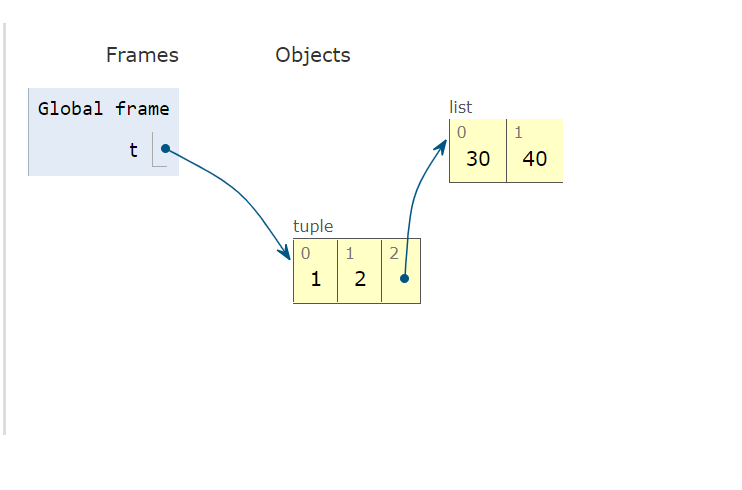


**after t[2]+=[50,60] executed visualisation is**


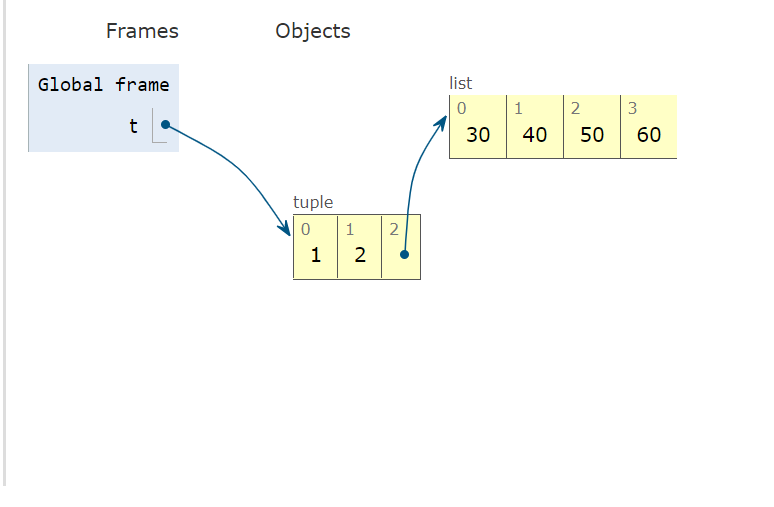

**so the answer is , t will become (1, 2, [30, 40, 50, 60]) and also TypeError is raised with the message 'tuple' object does not support item assignment.**


Note :[online Python Tutor](http://www.pythontutor.com/)  to visualise how python works step by step

In [76]:
import dis 
dis.dis('s[a] += b')

  1           0 LOAD_NAME                0 (s)
              2 LOAD_NAME                1 (a)
              4 DUP_TOP_TWO
              6 BINARY_SUBSCR
              8 LOAD_NAME                2 (b)
             10 INPLACE_ADD
             12 ROT_THREE
             14 STORE_SUBSCR
             16 LOAD_CONST               0 (None)
             18 RETURN_VALUE


### Conclusion 

- Put the value of s[a] on TOS (Top Of Stack).
- Perform TOS += b. This succeeds if TOS refers to a mutable object (it’s a list, in
Example 2-15).
- Assign s[a] = TOS. This fails if s is immutable (the t tuple in Example 2-15)

### 3 Lessons :
- Putting mutable items in tuples is not a good idea.Augmented Assignment with Sequences  
- Augmented assignment is not an atomic operation—we just saw it throwing an exception after doing part of its job.
- Inspecting Python bytecode is not too difficult, and is often helpful to see what is going on under the hood. 

### list.sort and the sorted Built-In Function

**list.sort**
- this method sorts a list in place—that is, without making a copy
- returns None
- changes the target object , doesn't create a new list


**Note : Functions and object that changes the current object returns None. This is because to clear to the caller that the object itself has changed.And no new object has created.**

This same behaviour of changing object and returning None could be seen in random.shuffle function.

**sorted**
- always creates a new list and returns it
- accepts any iterable object as an argument 
- accepts both immutable sequence and generators


**list.sort** and **sorted**
- takes two optional keyword only
1. reverse
2. key

**reverse**
- If True , item returned in descending order
- default value is false

**key**
- one argument function
- will be applied to each item to produce its sorting key
- can also be used by min() , max() built ins and also with other standard library ( itertools.groupby(), heapq.nlargest())
- default is identity function

    example :

    - key=str.lower --> used to perform a case sensative sort 
    - key=str.len --> 


In [23]:
fruits = ['grape', 'raspberry', 'apple', 'banana']

In [24]:
sorted(fruits)

['apple', 'banana', 'grape', 'raspberry']

In [25]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [26]:
sorted(fruits,reverse=True)

['raspberry', 'grape', 'banana', 'apple']

In [27]:
sorted(fruits,key=len)

['grape', 'apple', 'banana', 'raspberry']

In [28]:
# ascending order 
sorted(fruits,reverse=True,key=len) 

['raspberry', 'banana', 'grape', 'apple']

In [29]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [30]:
fruits.sort()

In [31]:
fruits

['apple', 'banana', 'grape', 'raspberry']

In [32]:
fruits1 = ['grape', 'raspberry', 'apple', 'banana']

In [33]:
list.sort(fruits1)

In [34]:
fruits1

['apple', 'banana', 'grape', 'raspberry']

Sorting Algo used --> Timsort

- Once sequences are sorted , they can be very efficiently searched.
- the standard binary search algorithm is already provided in the bisect module of the Python standard library. 
- bisect.insort --> can use to make sure my sorted sequences stay sorted

### Managing Ordered Sequences with bisect
- The bisect module offers two main functions—bisect and insort
- use the binary search algorithm to quickly find and insert items in any sorted sequence.
- bisect returns the position number of the needle in haystack (for unsorted elements)
- insort insert the number in the correct posion (for unsorted elements)

### Searching with bisect
- bisect (haystack, needle)
- does a binary search for needle in haystack
- must be a sorted sequence to locate the position where the needle can be inserted while mantaining haystack in ascending order 
- all items appearing up to position are less than or equal to needle

haystack ---  all the elements 

needle ---element that needed to be find in the haystack

We could use  the result of bisect(haystack,needle) as the index argument to haystack.insert(index, needle)—however, using
insort does both steps, and is faster.


**Meaning :**

so after finding the result with neddle in haystack , we can insert needle in a certain index in the haystack. but these two steps are done in the insort. 

so insort is faster.

### Additional info 

Raymond Hettinger - a profilic Python contributor - has a Sorted Collection recipe that leverages the bisect module but is easier to use than these standalone functions.

-- Link doesn't work

- bisect. bisect_left returns the leftmost place in the sorted list to insert the given element.
- bisect. bisect_right returns the rightmost place in the sorted list to insert the given element.

### Example 2-17. bisect finds insertion points for items in a sorted sequence

Mainly we need to run this example in or cmd
 
 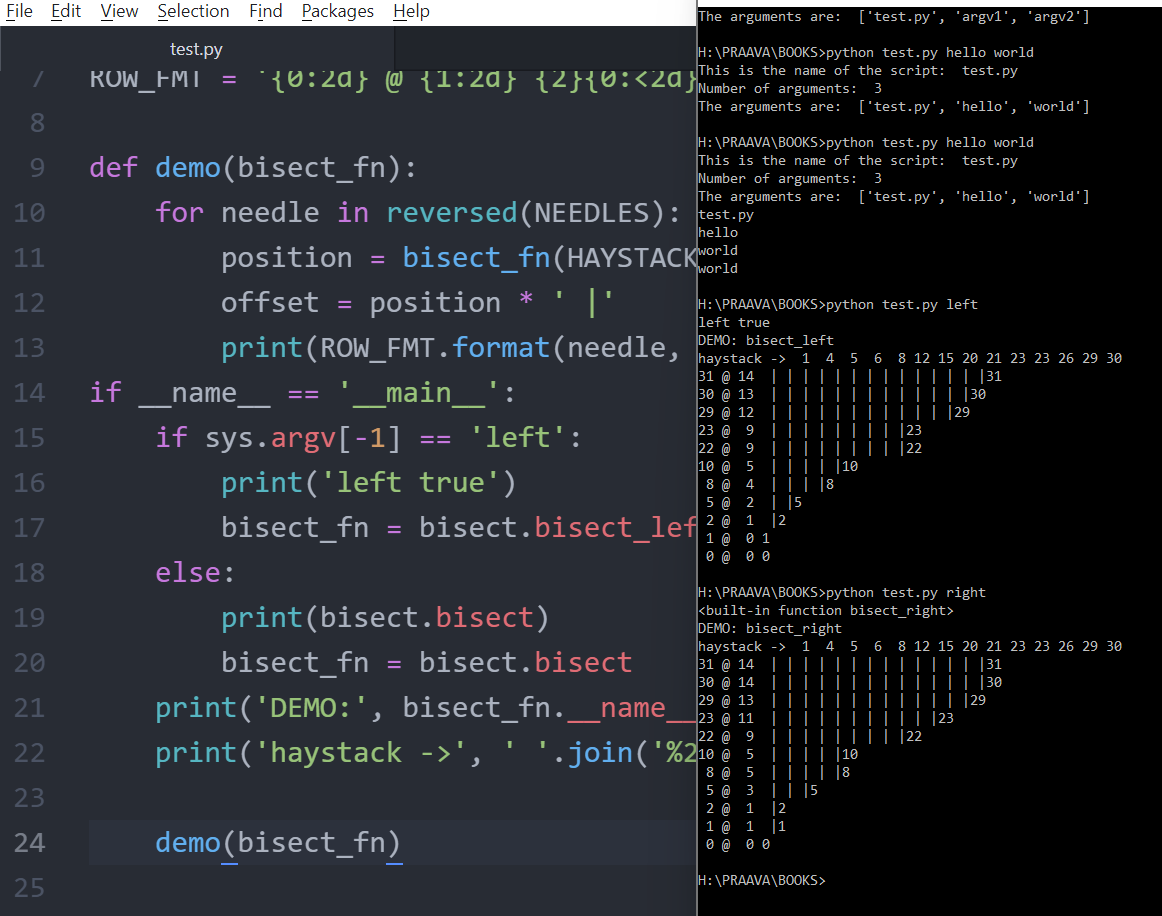


In [53]:
import bisect
import sys

In [54]:
HAYSTACK = [1, 4, 5, 6, 8, 12, 15, 20, 21, 23, 23, 26, 29, 30]
NEEDLES = [0, 1, 2, 5, 8, 10, 22, 23, 29, 30, 31]

ROW_FMT = '{0:2d} @ {1:2d} {2}{0:<2d}'

In [55]:
def demo(bisect_fn):
    for needle in reversed(NEEDLES):
        position = bisect_fn(HAYSTACK, needle)
        offset = position * ' |'
        print(ROW_FMT.format(needle, position, offset))

In [56]:
sys.argv[0]

'C:\\Users\\hp\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py'

In [63]:
if __name__ == '__main__':
    if sys.argv[-1] == 'left':
        print('left true')
        bisect_fn = bisect.bisect_left #returns bisect_left
    else:
        print('right true')
        print(bisect.bisect)
        bisect_fn = bisect.bisect # returns bisect_right 
    print('DEMO:', bisect_fn.__name__)
    print('haystack ->', ' '.join('%2d' % n for n in HAYSTACK))
    
    demo(bisect_fn)
        

right true
<built-in function bisect_right>
DEMO: bisect_right
haystack ->  1  4  5  6  8 12 15 20 21 23 23 26 29 30
31 @ 14  | | | | | | | | | | | | | |31
30 @ 14  | | | | | | | | | | | | | |30
29 @ 13  | | | | | | | | | | | | |29
23 @ 11  | | | | | | | | | | |23
22 @  9  | | | | | | | | |22
10 @  5  | | | | |10
 8 @  5  | | | | |8 
 5 @  3  | | |5 
 2 @  1  |2 
 1 @  1  |1 
 0 @  0 0 


Output of with bisect in use—each row starts with the notation
needle @ position and the needle value appears again below its insertion point in
the haystack

The behavior of bisect can be fine-tuned in two ways.
- First, a pair of optional arguments, lo and hi, allow narrowing the region in the sequence to be searched when inserting. 
- lo defaults to 0 and hi to the len() of the sequence.
- **Second, bisect is actually an alias for bisect_right, and there is a sister function called bisect_left. **
Their difference is apparent only when the needle compares equal to an
item in the list: bisect_right returns an insertion point after the existing item, and
bisect_left returns the position of the existing item, so insertion would occur before
it. With simple types like int this makes no difference, but if the sequence contains
objects that are distinct yet compare equal, then it may be relevant. For example, 1 and
1.0 are distinct, but 1 == 1.0 is True. 

An interesting application of bisect is to perform table lookups by numeric values—
for example, to convert test scores to letter grades,

Figure 2-5 shows the result of using bisect_left.

In [66]:
def grade(score, breakpoints=[60, 70, 80, 90], grades='FDCBA'):
#     bisect.bisect returns the position number
    i = bisect.bisect(breakpoints, score) #bisect.bisect(haystack,needle) and its bisect right 
    print("i",i)
    return grades[i]


In [67]:
[grade(score) for score in [33, 99, 77, 70, 89, 90, 100]]

i 0
i 4
i 2
i 2
i 3
i 4
i 4


['F', 'A', 'C', 'C', 'B', 'A', 'A']

1. https://docs.python.org/3/library/bisect.html

These functions are not only used for searching, but also for inserting items in sorted
sequences, as the following section shows.

These functions are not only used for searching, but also for inserting items in sorted
sequences, as the following section shows.

### Inserting with bisect.insort
### bisect.insort
- Sorting is expensive, so once you have a sorted sequence, it’s good to keep it that way.That is why bisect.insort was created.

- insort(seq, item) inserts item into seq so as to keep seq in ascending order.

Example 2-19. Insort keeps a sorted sequence always sorted

In [37]:
import bisect
import random

In [38]:
SIZE =7

In [39]:
random.seed(1729)

In [40]:
my_list=[]

In [41]:
my_list

[]

In [42]:
for i in range(SIZE):
    new_item = random.randrange(SIZE*2)
#     print(new_item)
    bisect.insort(my_list,new_item)
#     %2d means space for the %item 
    print('%2d->'%new_item,my_list) 

10-> [10]
 0-> [0, 10]
 6-> [0, 6, 10]
 8-> [0, 6, 8, 10]
 7-> [0, 6, 7, 8, 10]
 2-> [0, 2, 6, 7, 8, 10]
10-> [0, 2, 6, 7, 8, 10, 10]


bisect.insort(lo,hi)
- takes optional lo,hi arguments limit the search to a subsequence

**Much of what we have seen so far in this chapter applies to sequences in general, not
just lists or tuples**

# When a list is not the Answer

>- If we need to store 10 million float value , array is much efficient, because an array does not actually hold full-fledged float objects but only the packed bytes represnting their machine values.
>- so constantly adding and removing items from the ends of a list as a FIFO or LIFO data structure, a deque (double-ended queue)works faster.
>- If the code does a lot of **containment checks** (e.g., item in my_collection), use a set for my_collection, especially if it holds a large number of items.

Sets are optimized for fast membership checking.  But they are ot sequenced as they are unorderd. 
# What makes sets faster than list in case of searching for elements ?

- Generally the lists are faster than sets. But in the case of searching for an element in a collection, sets are faster because sets have been implemented using hash tables. So basically Python does not have to search the full set, which means that the time complexity in average is O(1). 
- Lists use dynamic arrays and Python needs to check the full array to search. So it takes O(n).
- set doesn;t have any duplicates , unordered , unchangable
- lists collection which is ordered and changeable. Allows duplicate members.


**Note :For the remainder of this chapter, we discuss mutable sequence types that can replace
lists in many cases, starting with arrays.**

# Python array background

- Lists are built into the Python programming language, whereas arrays aren't. 
- Arrays are not a built-in data structure, and therefore need to be imported via the array module in order to be used.
- Arrays of the array module are a thin wrapper over C arrays, and are useful when you want to work with homogeneous data.

# Arrays (why chose it over List)

- array.array is much efficient if the list only contains numbers
- supports all mutable sequence operations -
    - .pop,.insert,.extend
- supports additional methods for fast loading and saving such as-
    - .frombytes and .tofile
    - array.tofile(f)
        Write all items (as machine values) to the file object f.
    - array.frombytes(s)
        Appends items from the string, interpreting the string as an array of machine values (as if it had been read from a file using the fromfile() method).
- Python array is like C array
- When creating an array, you provide a typecode, a letter to determine the underlying C type used to store each item in the array

For exapmle ```array.array('b',[1,2,3])```

>b is the typecode for signed char. 
If we create an array('b'), then each item will be stored in a single byte and interpreted as an integer from –128 to 127.

>For large sequences of numbers, this saves a lot of memory. And Python will not let you put any
number that does not match the type for the array.

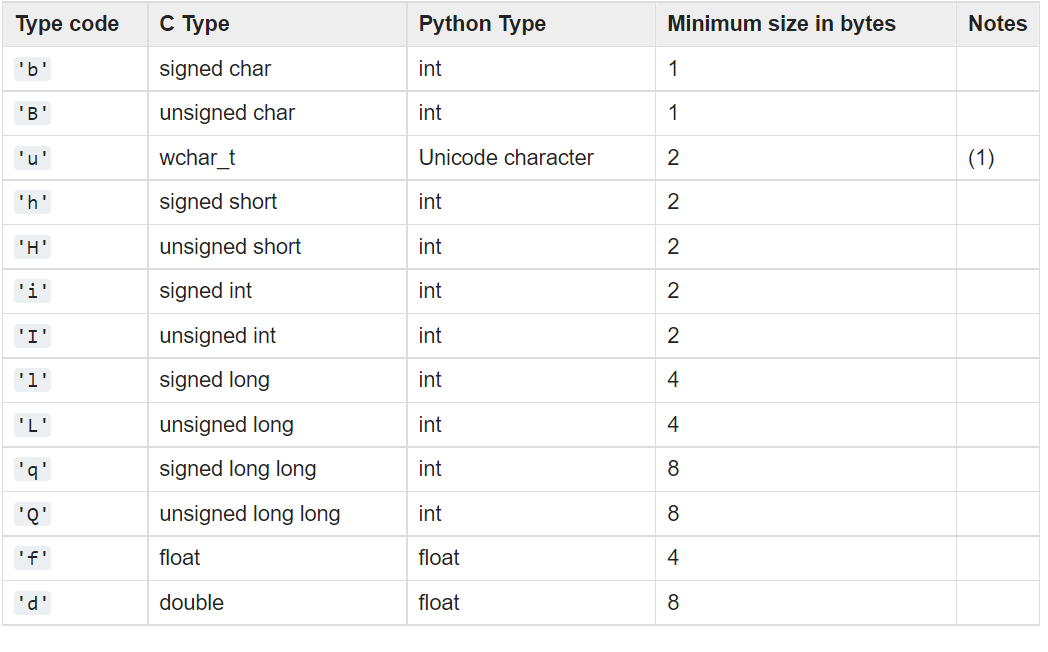



        




In [17]:
from array import array
from random import random

In [18]:
# creating total 10**7 array and the values are random 
floats=array('d',(random() for i in range(10**7))) 

In [19]:
floats[-1] #last value of array

0.010432142688616586

In [20]:
fp = open('floats.bin', 'wb') 

In [21]:
# writing arrays into a file 
floats.tofile(fp) 

In [22]:
fp.close()

In [23]:
# initiating new array variable
floats2 = array('d')

In [24]:
# opening file in read mode
fp = open('floats.bin', 'rb')

In [25]:
# reading the stored value and storing into float2 var
floats2.fromfile(fp, 10**7)

In [26]:
fp.close()

In [27]:
floats2[-1]

0.010432142688616586

In [28]:
floats2 == floats

True

**More info on arrays :**

# Arrays write in text vs in binary file 

- A quick experiment shows that it takes about 0.1s for array.fromfile to load 10 million double-precision floats from a binary file created with array.tofile 
- reading this way is nearly 60 times faster than reading the number from a text file which also involves parsing each line with float built in
- saving in array.tofile() is 7 times faster than writing one float per line in a text file
- For the same data with 10 million doubles 
    - binary file size : 80,000,000 (8 bytes per double, zero overhead)
    - text file size: 181,515,739 bytes
    

Another fast and more flexible way of saving numeric data is --- 
```pickle module for serialization```

- saving an array with pickle.dump is almost as fast as with array.tofile
- however pickle handles almost all built-in types, including 
    - complex numbers
    - nested collections
    - instances of user defined classes automatically 
    
Note: For specific case of numeric arrays representing binary data such as  raster images , Python has the bytes and bytearray type discussed in chapter 4 

# Write stuff about Pickle 
### hi

### comparing the features of list and array.array.
 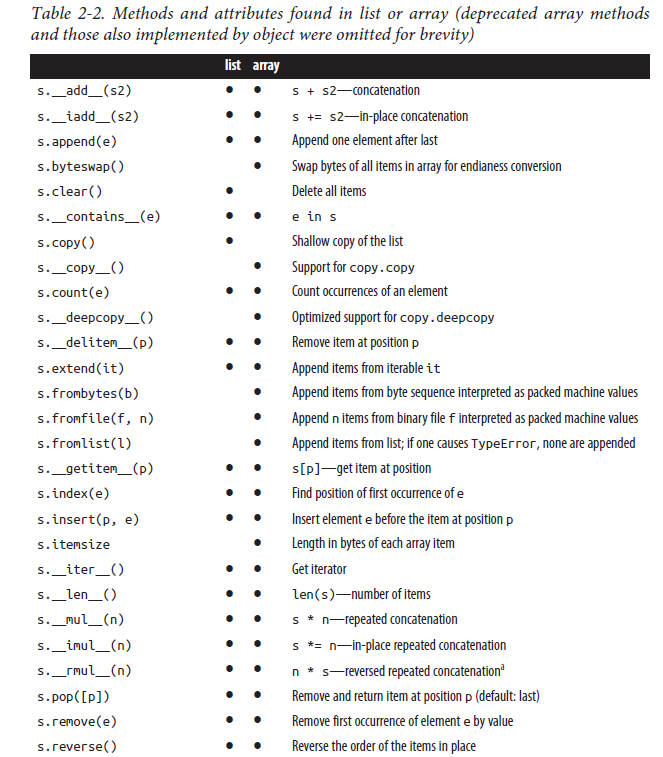
    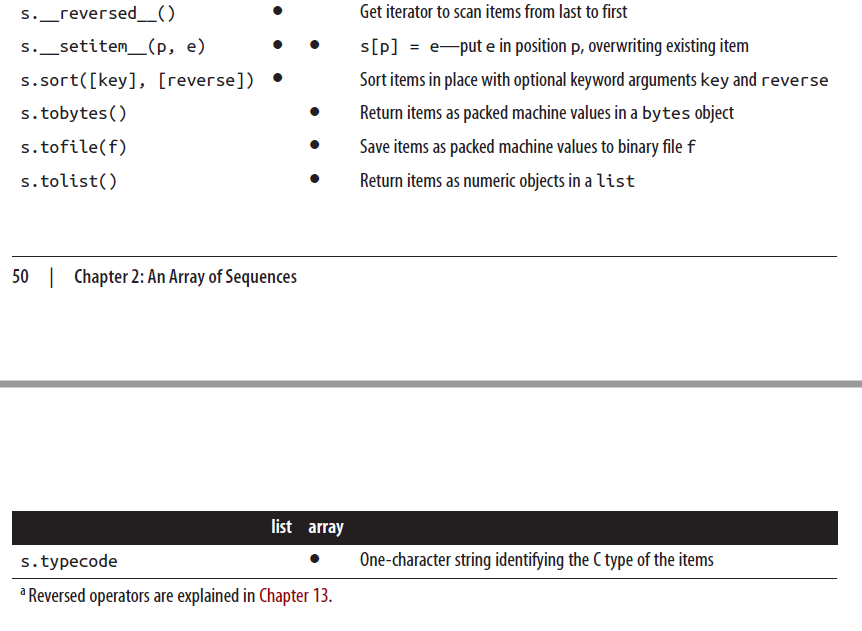
 
 

# write all about this function and run code with all these function 

- the array type does not have an in-place sort method like list.sort().
- to sort an array, we use the sorted function to rebuild it sorted:

```a = array.array(a.typecode, sorted(a))```

To keep a sorted array sorted while adding items to it, use the

[bisect.insort](#bisect.insort) 

function

If you do a lot of work with arrays and don’t know about memoryview, you’re missing
out. See the next topic.😌

# Memory Views

>- The built-in ```memorview class``` is a shared-memory sequence type that lets us handle
slices of arrays without copying bytes

>- inspired by numpy library

### memoryview
- essentially a generalized Numpy array structure in Python itself(without the math) 
- allows us to share memory between data structures (things like 
    - PIL images, 
    - SQLite databases, 
    - Numpy arrays etc.)
    
Note : very important for large data sets.

### memoryview.cast (method)

- using notation similar to the array module , the  method lets us change the way multiple bytes are read or written as units without moving bits around (just like the C cast operator).
- returns yet another memoryview object, always sharing the same memory

Example 2-21. Changing the value of an array item by poking one of its bytes

In [71]:
import array
#building memoryview from array of 5 short signed integers (typecode 'h').
numbers=array.array('h',[-2,-1,0,1,2])

memv=memoryview(numbers)

In [72]:
len(memv)

5

In [73]:
# memv sees the same 5 items in the array.
memv[0]

-2

In [74]:
memv_oct=memv.cast('B')

In [75]:
memv_oct

In [76]:
memv_oct.tolist()

[254, 255, 255, 255, 0, 0, 1, 0, 2, 0]

In [42]:
memv_oct[5]

0

In [43]:
memv_oct[5]=4

In [45]:
memv_oct[5]

4

In [46]:
numbers

array('h', [-2, -1, 1024, 1, 2])

Note: will see another short example with memoryview in the context of binary sequence manipulatations with struct 

**Also if we are doing advanced numeric processing in arrays, we should be using
the NumPy and SciPy libraries. We’ll take a brief look at them right away.**

# Numpy and Scipy

- For advanced array and matrix operations, Numpy and Scipy are the reason why Python became mainstream in scientific computing applications

### Numpy

- implements 
    - multidimensional, 
    - homogeneous arrays and 
    - matrix types 
    
  that hold not only numbers but also user defined records, and 
- provides efficient elementwise operations


### SciPy

- is a library , written on top of NumPy,
- offering many scientific computing algorithms from
    - linear algebra ,
    - numerical calculus
    - and statistics
- its fast and reliable because :
    - it leverages the widely used C and Fortran code [based from the https://netlib.org/]

SciPy gives scientist the best of the both worlds -
- an interactive prompt and high-level Python APIs , together with industrial-strength number-crunching functions optimized in C and Fortran



As a very brief demo, Example 2-22 shows some basic operations with two-dimensional
arrays in NumPy

Example 2-22. Basic operations with rows and columns in a numpy.ndarray

In [8]:
! conda install numpy

^C
